In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/DATN/Dataraw.csv', encoding='latin1')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
data["Late_delivery_risk"].value_counts(normalize = True)*100

,proportion
Late_delivery_risk,
1,54.829132
0,45.170868


# **1. Exploratory Data Analysis**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## **1.1 Data Visualization**

**SALES PER DELIVERY STATUS:**


In [ ]:
sales_per_delivery_status = data.groupby('Delivery Status')['Sales'].sum()
sales_per_delivery_status

,Sales
Delivery Status,
Advance shipping,8.518008e+06
Late delivery,2.012640e+07
Shipping canceled,1.570305e+06
Shipping on time,6.570026e+06


Late delivery chiếm phần lớn doanh thu → có thể là do khách hàng lớn, hoặc do sản phẩm đắt tiền thường gặp trễ.

Canceled shipping thấp → ít bị hủy, tốt cho vận hành.

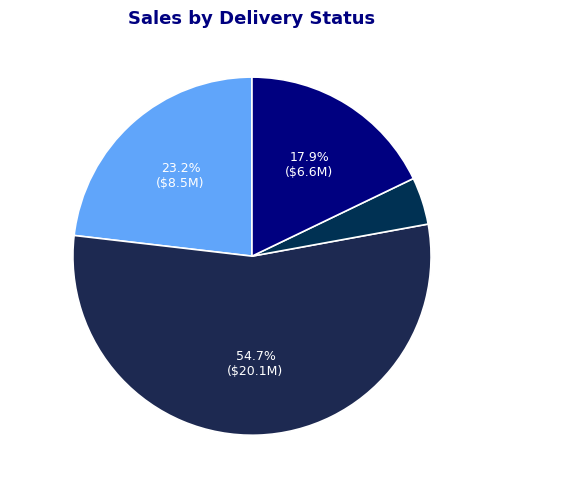

In [ ]:
plt.figure(figsize=(6,5))
colors = ['#60A5FA', '#1D2951', '#003153', '#000080']

def fmt(pct, vals):
    v = int(pct/100.*sum(vals))
    return f'{pct:.1f}%\n(${v/1e6:.1f}M)' if pct > 5 else ''

plt.pie(
    sales_per_delivery_status,
    labels=sales_per_delivery_status.index,
    autopct=lambda p: fmt(p, sales_per_delivery_status),
    colors=colors,
    startangle=90,
    textprops={'fontsize':9, 'color':'white'},
    wedgeprops={'edgecolor':'white','linewidth':1.2}
)

plt.title('Sales by Delivery Status', color='#000080', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


Biểu đồ tròn này cho thấy cơ cấu doanh thu theo trạng thái giao hàng.
Phần lớn doanh thu (54,7%) đến từ các đơn hàng giao trễ, cho thấy một vấn đề vận hành nghiêm trọng có thể ảnh hưởng đến mức độ hài lòng của khách hàng.
Các đơn hàng giao sớm chiếm 23,2% doanh thu, thể hiện một phần hiệu quả trong quy trình vận hành, trong khi các đơn giao đúng hạn chiếm 17,9%.
Các đơn bị hủy chiếm 4,3% doanh thu, gợi ý một khoản thất thoát doanh thu tiềm tàng.
Việc doanh thu chủ yếu đến từ các đơn giao trễ cho thấy rằng cải thiện thời gian giao hàng có thể nâng cao sự hài lòng khách hàng và giảm rủi ro vận hành.

**SALES PER MARKET**

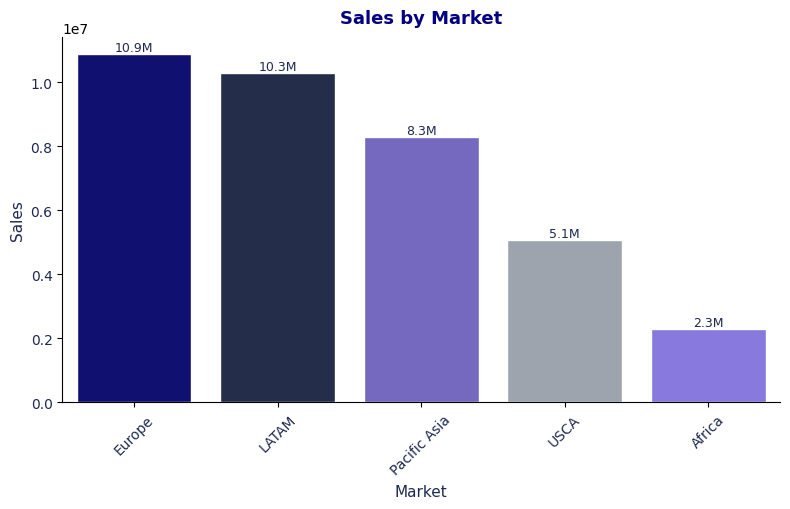

In [ ]:
sales_per_market = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5.2))
colors = ['#000080', '#1D2951', '#6A5ACD', '#9CA3AF', '#7B68EE', '#4B0082']

ax = sns.barplot(
    x=sales_per_market.index,
    y=sales_per_market.values,
    palette=colors[:len(sales_per_market)],
    edgecolor='white'
)

for i, v in enumerate(sales_per_market.values):
    ax.text(i, v, f'{v/1e6:.1f}M', ha='center', va='bottom', fontsize=9, color='#1D2951')

plt.title('Sales by Market', color='#000080', fontsize=13, fontweight='bold', pad=10)
plt.xlabel('Market', fontsize=11, color='#1D2951', labelpad=5)
plt.ylabel('Sales', fontsize=11, color='#1D2951')
plt.xticks(rotation=45, fontsize=10, color='#1D2951')
plt.yticks(color='#1D2951')
sns.despine()
plt.tight_layout()
plt.show()

Châu Âu dẫn đầu về doanh thu, đóng góp lớn nhất, theo sát là khu vực LATAM.
Khu vực Thái Bình Dương – Châu Á cũng chiếm một phần đáng kể trong tổng doanh thu nhưng vẫn thấp hơn Châu Âu và LATAM.
Khu vực USCA đứng sau đó, trong khi Châu Phi có mức doanh thu thấp nhất trong các thị trường.
Khoảng cách rõ rệt giữa các khu vực này cho thấy sự khác biệt tiềm tàng về quy mô thị trường, tệp khách hàng hoặc hiệu suất giao hàng giữa các vùng địa lý.

**TOP 10 SALES PER PRODUCT CATEGORY:**

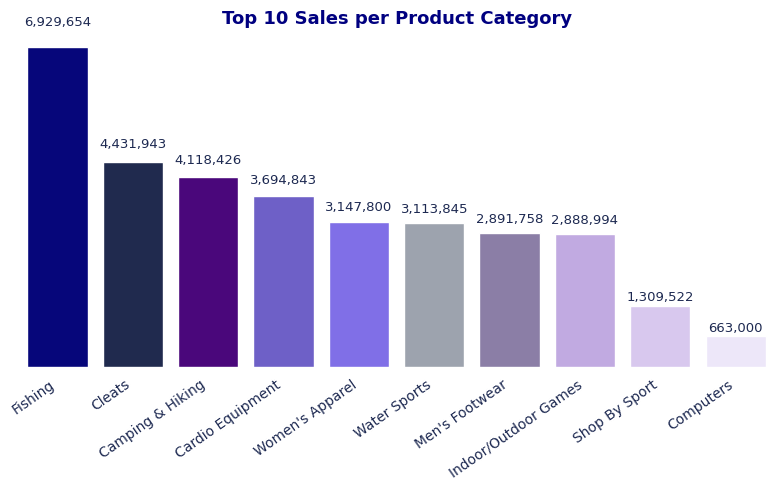

In [ ]:
sales_per_category = data.groupby('Category Name')['Sales'].sum().sort_values(ascending=False)
top_10 = sales_per_category.head(10)

sns.set_style("white")

plt.figure(figsize=(8, 5))

colors = ['#000080', '#1D2951', '#4B0082', '#6A5ACD', '#7B68EE',
          '#9CA3AF', '#8A7CA8', '#C1A7E4', '#D8C6F0', '#EDE6FA']

bars = sns.barplot(
    x=top_10.index,
    y=top_10.values,
    palette=colors[:len(top_10)],
    saturation=0.9
)
for i, v in enumerate(top_10.values):
    plt.text(i, v + (v * 0.06), f'{v:,.0f}', ha='center', va='bottom', fontsize=9.5, color='#1D2951')
plt.title('Top 10 Sales per Product Category', fontsize=13, weight='bold', color='#000080')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=35, ha='right', fontsize=10, color='#1D2951')
plt.yticks([], color='#1D2951')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**TOP 10 REGIONS WITH LOSS:**

Biểu đồ cột này thể hiện 10 danh mục sản phẩm có doanh số cao nhất.
Danh mục Fishing dẫn đầu rõ rệt với doanh số hơn 6 triệu USD, theo sau là Cleats và Camping & Hiking, mỗi danh mục đóng góp khoảng 4 triệu USD.
Các nhóm như Cardio Equipment, Women's Apparel, và Water Sports có doanh số thấp hơn một chút nhưng vẫn ở mức đáng kể.
Ngoài ra, Men’s Footwear, Indoor/Outdoor Games, và Shop By Sport cũng đạt kết quả tốt, trong khi Computers đứng cuối trong top 10 danh mục có doanh số cao nhất.

In [ ]:
regions_with_loss = data[data['Benefit per order'] < 0].groupby('Order Region')['Sales'].sum().sort_values(ascending=False)
regions_with_loss.head(10)

,Sales
Order Region,
Western Europe,1.120912e+06
Central America,1.049633e+06
South America,5.414282e+05
Northern Europe,4.023718e+05
Oceania,3.900111e+05
Southern Europe,3.764023e+05
Southeast Asia,3.519799e+05
Caribbean,3.075977e+05
South Asia,2.960052e+05


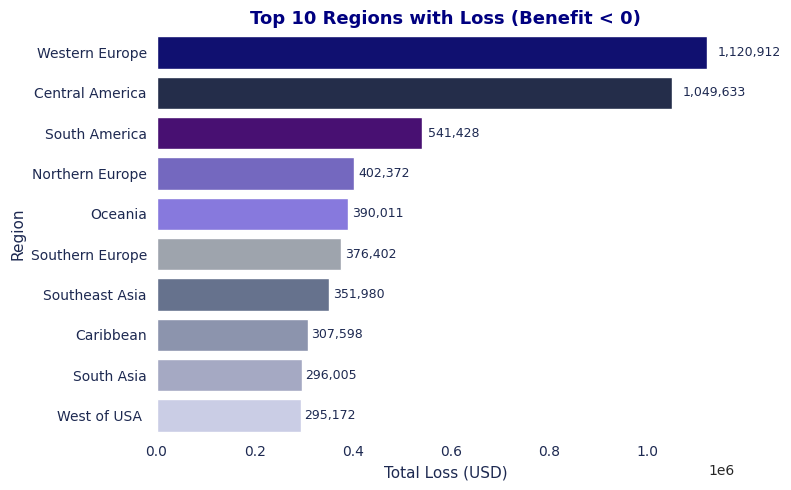

In [ ]:
top_10_loss = regions_with_loss.head(10)

plt.figure(figsize=(8, 5))
colors = ['#000080', '#1D2951', '#4B0082', '#6A5ACD', '#7B68EE', '#9CA3AF', '#5F6F94', '#8791B2', '#A0A5C8', '#C5CAE9']

ax = sns.barplot(
    x=top_10_loss.values,
    y=top_10_loss.index,
    palette=colors[:len(top_10_loss)]
)

# Hiển thị số cuối mỗi cột
for i, v in enumerate(top_10_loss.values):
    ax.text(v + abs(v)*0.02, i, f"{v:,.0f}", va='center', fontsize=9, color='#1D2951')

plt.title('Top 10 Regions with Loss (Benefit < 0)', fontsize=13, color='#000080', fontweight='bold')
plt.xlabel('Total Loss (USD)', fontsize=11, color='#1D2951')
plt.ylabel('Region', fontsize=11, color='#1D2951')
plt.xticks(color='#1D2951')
plt.yticks(color='#1D2951')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Tây Âu có mức thua lỗ lớn nhất, với Trung Mỹ và Nam Mỹ xếp ngay sau. Mặc dù Bắc Âu, Châu Đại Dương và Nam Âu cũng ghi nhận sụt giảm đáng kể, nhưng mức độ nhẹ hơn. Các khu vực như Đông Nam Á, Caribe, Nam Á và miền Tây Hoa Kỳ có mức thua lỗ nhỏ hơn, cho thấy sự ổn định tương đối nhưng vẫn cần theo dõi. Việc tập trung vào các khu vực có mức thua lỗ cao có thể giúp xác định điểm yếu trong vận hành và cải thiện lợi nhuận.

**TOP 10 PRODUCTS WITH LOSS:**

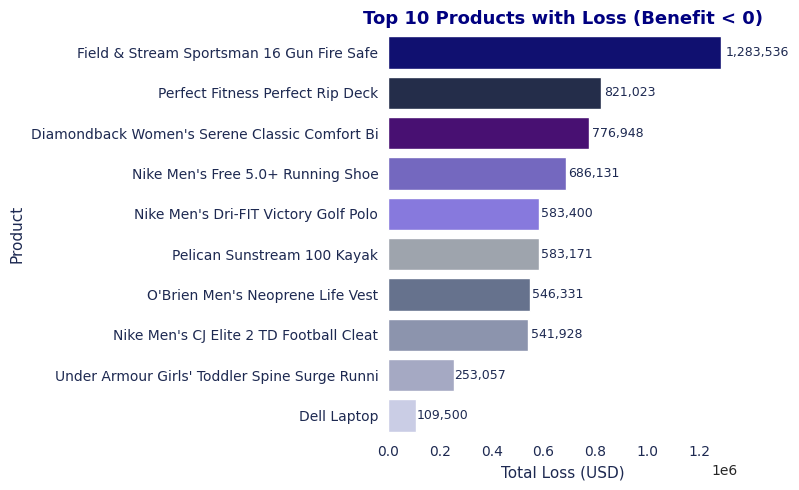

In [ ]:
top_10_products_loss = (
    data[data['Benefit per order'] < 0]
    .groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
colors = ['#000080', '#1D2951', '#4B0082', '#6A5ACD', '#7B68EE', '#9CA3AF', '#5F6F94', '#8791B2', '#A0A5C8', '#C5CAE9']

ax = sns.barplot(
    x=top_10_products_loss.values,
    y=top_10_products_loss.index,
    palette=colors[:len(top_10_products_loss)]
)

# Hiển thị số cuối mỗi thanh
for i, v in enumerate(top_10_products_loss.values):
    ax.text(v + abs(v)*0.015, i, f"{v:,.0f}", va='center', fontsize=9, color='#1D2951')

plt.title('Top 10 Products with Loss (Benefit < 0)', fontsize=13, color='#000080', fontweight='bold')
plt.xlabel('Total Loss (USD)', fontsize=11, color='#1D2951')
plt.ylabel('Product', fontsize=11, color='#1D2951')
plt.xticks(color='#1D2951')
plt.yticks(color='#1D2951')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**PAYMENT TYPE VS. LATE DELIVERY RISK:**

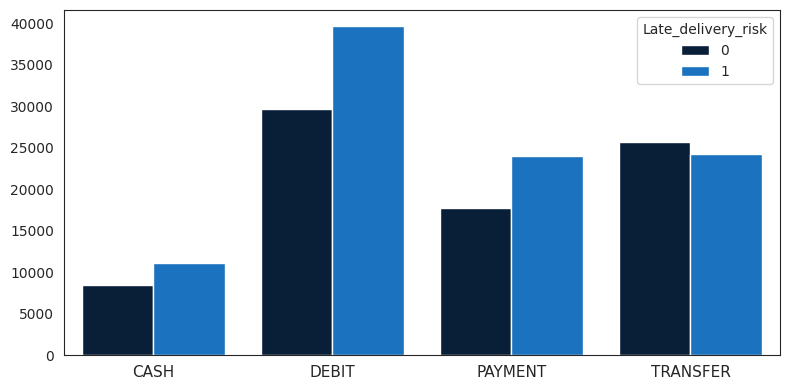

In [ ]:
payment_late_risk = data.groupby(['Type', 'Late_delivery_risk']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(
    data=payment_late_risk,
    x='Type',
    y='Count',
    hue='Late_delivery_risk',
    palette=['#001F3F', '#0074D9']
)

plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


 Phân tích: Hình thức thanh toán và rủi ro giao hàng trễ

Biểu đồ cột này mô tả **mối quan hệ giữa các hình thức thanh toán khác nhau và rủi ro giao hàng trễ**.  
- **DEBIT** có số lượng đơn hàng giao trễ cao nhất (màu cam), vượt trội so với đơn hàng giao đúng hạn.  
- **CASH** có tổng số đơn hàng thấp nhất, với số đơn giao trễ cũng ít hơn so với các hình thức khác.  
- **PAYMENT** và **TRANSFER** có tỷ lệ đơn giao đúng hạn (màu xanh) và giao trễ tương đối cân bằng.  

 Kết quả cho thấy một số hình thức thanh toán, đặc biệt là **DEBIT**, có liên quan đến **rủi ro giao hàng trễ cao hơn**, gợi ý khả năng tồn tại **bất cập trong quy trình vận hành hoặc xử lý giao dịch** đối với các loại thanh toán này.


**NUMBER OF ORDERS FROM DIFFERENT DEPARTMENTS VS SHIPPING MODE:**

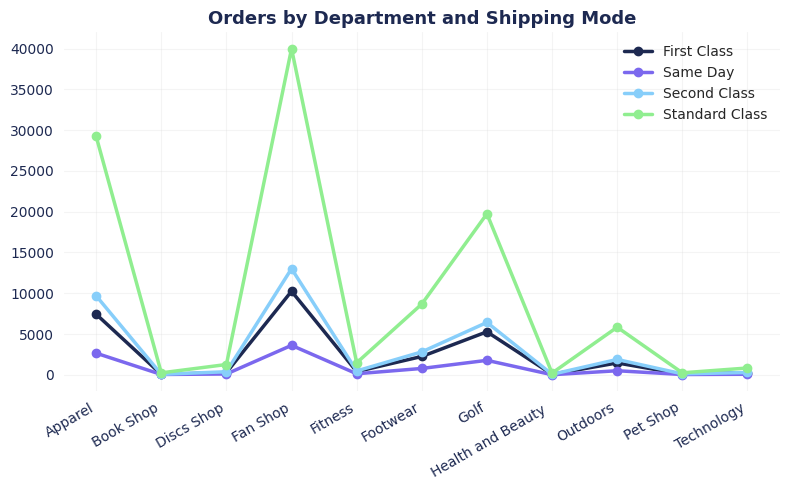

In [ ]:
category_shipping = data.groupby(['Department Name', 'Shipping Mode']).size().unstack(fill_value=0)

colors = ['#1D2951', '#7B68EE', '#87CEFA', '#90EE90']

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

for mode, color in zip(category_shipping.columns, colors):
    plt.plot(
        category_shipping.index,
        category_shipping[mode],
        marker='o',
        linewidth=2.5,
        markersize=6,
        label=mode,
        color=color
    )

# Làm sạch và tinh chỉnh
plt.xticks(rotation=30, ha='right', fontsize=10, color='#1D2951')
plt.yticks(fontsize=10, color='#1D2951')
plt.title('Orders by Department and Shipping Mode', fontsize=13, fontweight='bold', color='#1D2951')
plt.grid(alpha=0.2)
plt.legend(frameon=False, loc='upper right')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


**LATE DELIVERIES VS. SHIPPING MODE VS. REGION:**

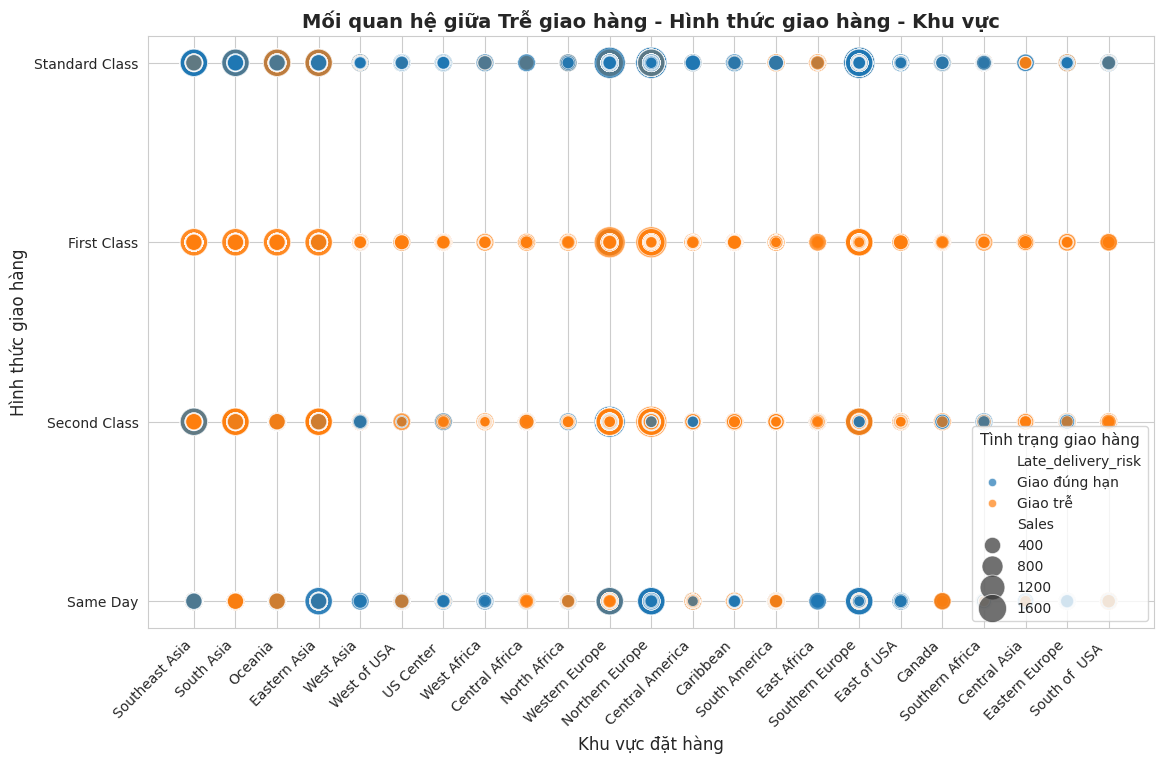

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='Order Region',
    y='Shipping Mode',
    hue='Late_delivery_risk',
    size='Sales',
    sizes=(50, 500),
    palette={0: '#1f77b4', 1: '#ff7f0e'},  # xanh dương & cam
    alpha=0.7
)

plt.title('Mối quan hệ giữa Trễ giao hàng - Hình thức giao hàng - Khu vực', fontsize=14, weight='bold')
plt.xlabel('Khu vực đặt hàng', fontsize=12)
plt.ylabel('Hình thức giao hàng', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Cập nhật chú thích tiếng Việt
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Giao đúng hạn' if l == '0' else 'Giao trễ' if l == '1' else l for l in labels]
plt.legend(handles, new_labels, title='Tình trạng giao hàng', fontsize=10, title_fontsize=11)

plt.tight_layout(pad=2)
plt.show()


**DELIVERY STATUS BY SHIPPING MODE:**

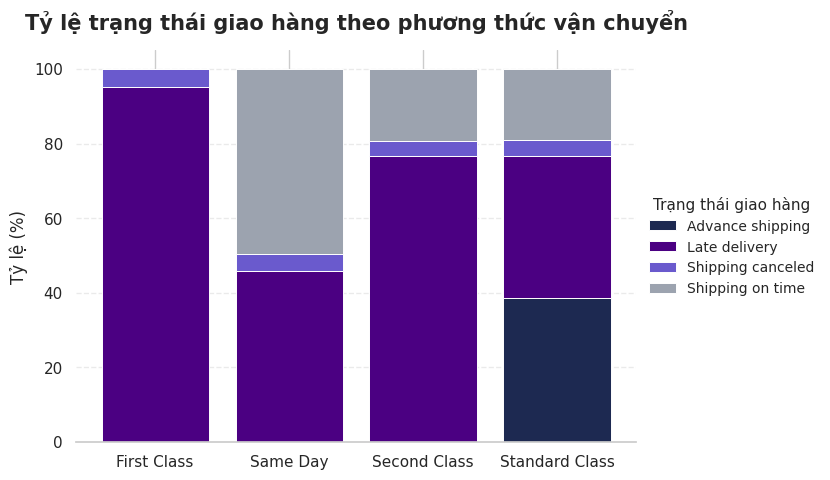

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tạo crosstab để tính tỷ lệ phần trăm
delivery_status_count = pd.crosstab(
    data['Shipping Mode'],
    data['Delivery Status']
)

# Chuyển sang tỷ lệ phần trăm
delivery_status_percent = delivery_status_count.div(
    delivery_status_count.sum(axis=1),
    axis=0
) * 100

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid", font_scale=1.1)

colors = ['#1D2951', '#4B0082', '#6A5ACD', '#9CA3AF']

bottom = None
for idx, column in enumerate(delivery_status_percent.columns):
    plt.bar(
        delivery_status_percent.index,
        delivery_status_percent[column],
        bottom=bottom,
        color=colors[idx],
        label=column,
        edgecolor='white',
        linewidth=0.7
    )
    bottom = (
        delivery_status_percent[column]
        if bottom is None
        else bottom + delivery_status_percent[column]
    )

plt.title('Tỷ lệ trạng thái giao hàng theo phương thức vận chuyển', fontsize=15, weight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.legend(
    title='Trạng thái giao hàng',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize=10,
    title_fontsize=11
)

sns.despine(left=True, right=True, top=True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Delivery Status by Shipping Mode

Biểu đồ thể hiện **tỷ lệ trạng thái giao hàng** (Advance shipping, Late delivery, Shipping canceled, Shipping on time) theo từng **phương thức vận chuyển** (First Class, Same Day, Second Class, Standard Class) của **DataCo Supply Chain**.

---
  Phân tích chính

- **Same Day**: Tỷ lệ giao đúng hạn cao nhất, rất ít đơn bị trễ hoặc hủy — hiệu quả vận hành tối ưu.  
- **First Class**: Chủ yếu giao sớm hoặc đúng hẹn, tỷ lệ trễ thấp.  
- **Second Class**: Tỷ lệ giao đúng hạn vẫn cao nhưng trễ/hủy tăng.  
- **Standard Class**: Giao trễ và hủy nhiều nhất, tỷ lệ đúng hạn thấp nhất.

---

  Kết luận

Phương thức vận chuyển càng **cao cấp (nhanh)** thì khả năng **giao đúng hạn hoặc sớm** càng lớn.  
Ngược lại, các hình thức **thường (Standard Class)** tiềm ẩn **rủi ro trễ/hủy cao hơn**.  
Doanh nghiệp có thể dựa trên biểu đồ này để **điều chỉnh chiến lược logistics** và **nâng cao trải nghiệm khách hàng**.

**SHIPPING DAYS VS. SHIPPING MODE**

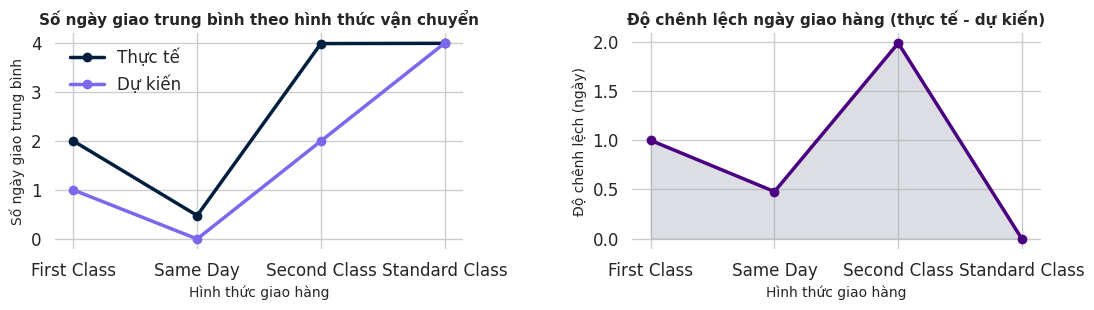

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

shipping_days = data.groupby('Shipping Mode').agg({
    'Days for shipping (real)': 'mean',
    'Days for shipment (scheduled)': 'mean'
}).reset_index()

shipping_days['Delivery Date Variance'] = (
    shipping_days['Days for shipping (real)'] - shipping_days['Days for shipment (scheduled)']
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(shipping_days['Shipping Mode'], shipping_days['Days for shipping (real)'],
         label='Thực tế', color='#001F3F', linewidth=2.5, marker='o')
plt.plot(shipping_days['Shipping Mode'], shipping_days['Days for shipment (scheduled)'],
         label='Dự kiến', color='#7B68EE', linewidth=2.5, marker='o')
plt.title('Số ngày giao trung bình theo hình thức vận chuyển', fontsize=11, weight='bold')
plt.xlabel('Hình thức giao hàng', fontsize=10)
plt.ylabel('Số ngày giao trung bình', fontsize=10)
plt.legend(frameon=False)
plt.box(False)

plt.subplot(1, 2, 2)
plt.plot(shipping_days['Shipping Mode'], shipping_days['Delivery Date Variance'],
         color='#4B0082', linewidth=2.5, marker='o')
plt.fill_between(shipping_days['Shipping Mode'], shipping_days['Delivery Date Variance'],
                 color='#9CA3AF', alpha=0.35)
plt.title('Độ chênh lệch ngày giao hàng (thực tế - dự kiến)', fontsize=11, weight='bold')
plt.xlabel('Hình thức giao hàng', fontsize=10)
plt.ylabel('Độ chênh lệch (ngày)', fontsize=10)
plt.box(False)

plt.tight_layout(pad=3)
plt.show()



**1. Số ngày giao trung bình**
- **Same Day:** Giao đúng cam kết (~0,5 ngày), hiệu quả cao.  
- **First Class:** Chênh nhẹ (~1 ngày), vẫn trong mức tốt.  
- **Second Class:** Trễ đáng kể (4 ngày thực tế vs 2 ngày dự kiến).  
- **Standard Class:** Thực tế sát dự kiến (4 ngày).

**2. Độ chênh lệch giao hàng**
- **Second Class:** Cao nhất (~2 ngày) → thường xuyên trễ.  
- **First Class & Same Day:** Ổn định, gần khớp dự kiến.  
- **Standard Class:** Gần bằng 0 → đáng tin cậy nhất.

---
 Insight thực tiễn
- **Second Class** là nguyên nhân chính gây trễ, cần xem xét tối ưu quy trình hoặc điều chỉnh cam kết giao hàng.  
- **Same Day** và **Standard Class** hoạt động ổn định, phù hợp làm nhóm dịch vụ trọng tâm.  
- Doanh nghiệp nên **đầu tư mở rộng Same Day** và **kiểm soát rủi ro Second Class** để nâng cao trải nghiệm khách hàng.

##**1.2 Correlation Analysis**

In [ ]:
numerical_data = data.select_dtypes(include = ['number']).copy()
numerical_data.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.75,314.640015,91.250000,NaN,1360,73,NaN,327.75,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.75,311.359985,-249.089996,NaN,1360,73,NaN,327.75,0


Thời gian thực tế vận chuyển (Days for shipping (real)) là yếu tố quan trọng nhất ảnh hưởng đến rủi ro giao trễ.
→ Có thể dùng làm biến dự báo (predictor) trong mô hình ML.

Thời gian dự kiến (Days for shipment (scheduled)) có quan hệ ngược lại — khi doanh nghiệp lên kế hoạch giao lâu hơn, khả năng giao trễ giảm.

Các yếu tố như giá sản phẩm, mã đơn, khu vực địa lý (Latitude/Longitude) hầu như không ảnh hưởng đến rủi ro giao trễ.

In [ ]:
columns_to_drop = [
    'Customer Id', 'Customer Zipcode', 'Order Customer Id', 'Order Id',
    'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id',
    'Product Category Id', 'Category Id', 'Department Id',
    'Latitude', 'Longitude', 'Order Zipcode',
    'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity',
    'Order Item Discount', 'Product Description', 'Product Status'
]

# Drop cột
numerical_df_cleaned = numerical_data.drop(columns=[c for c in columns_to_drop if c in numerical_data.columns])


In [ ]:
corr_pearson = numerical_df_cleaned.corr()

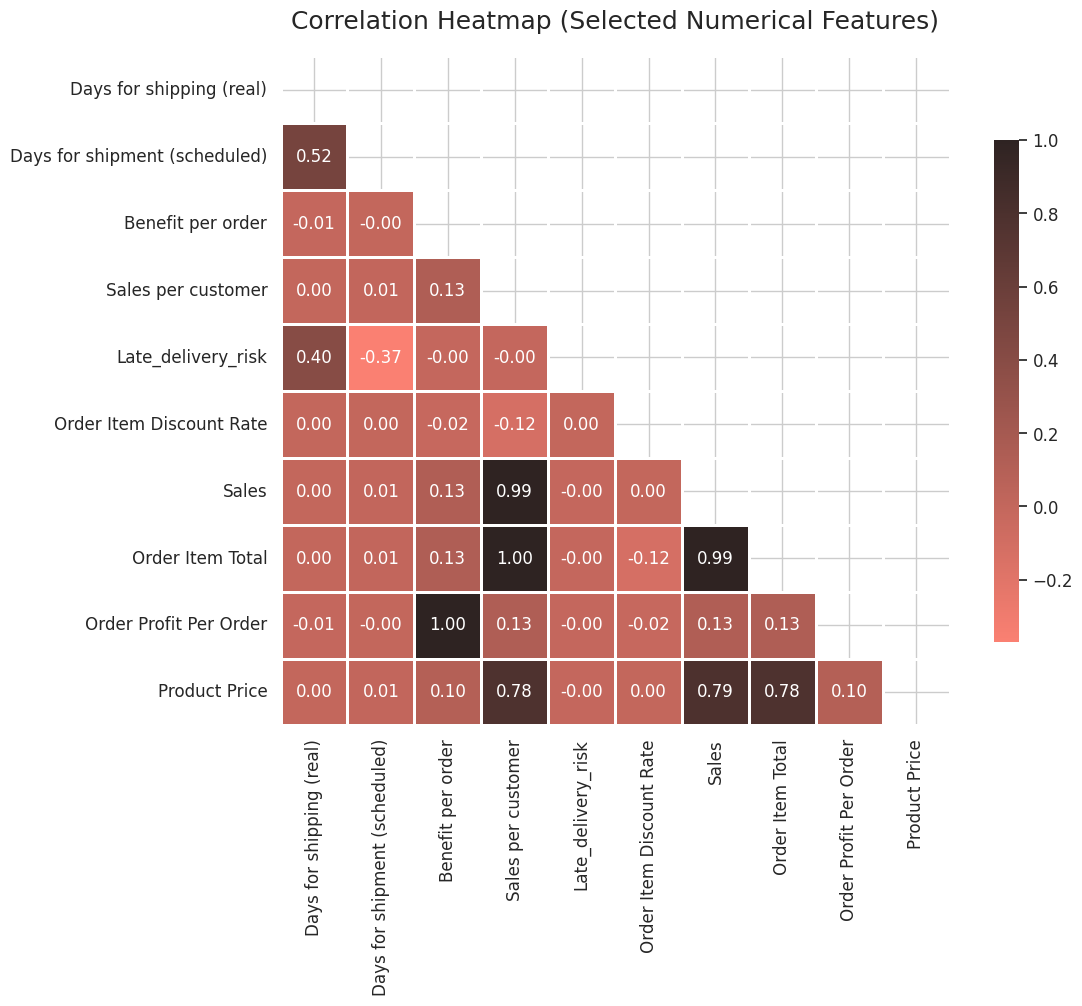

In [ ]:
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

colors = sns.color_palette("dark:salmon_r", as_cmap=True)

sns.heatmap(
    corr_pearson,
    annot=True,
    fmt=".2f",
    cmap=colors,
    mask=mask,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 12}
)

plt.title('Correlation Heatmap (Selected Numerical Features)', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

Ý Nghĩa Các Mối Liên Hệ Chính

- **Days for shipping (real) & Days for shipment (scheduled):** Tương quan mạnh (0.52) → lịch giao dự kiến ảnh hưởng nhiều đến thời gian giao thực tế.  
- **Benefit per order & Order Profit Per Order:** Tương quan gần như tuyệt đối (1.00) → hai biến có thể trùng nội dung.  
- **Sales / Order Item Total / Sales per customer:** Tương quan mạnh (0.99 - 1.00) → dễ hiểu, Sales là tổng Order Item Total.  
- **Product Price:** Tương quan mạnh với Order Item Total & Sales (0.78 - 0.79).  
- **Order Item Discount Rate:** Ngược chiều nhẹ với Sales per customer → giảm giá nhiều, doanh số mỗi khách giảm.  
- **Late_delivery_risk:**  
  - Thuận với Days for shipping (real) (0.40) → giao càng lâu, nguy cơ trễ càng cao.  
  - Ngược với Days for shipment (scheduled) (-0.37) → lịch dự kiến dài, nguy cơ trễ giảm.

 Ý Nghĩa Ứng Dụng ML

- Các biến tương quan cao (~1.0) nên cân nhắc loại bớt để tránh đa cộng tuyến.  
- Late_delivery_risk cần chú ý các yếu tố về thời gian giao, discount rate.  
- Biến độc lập hoặc yếu liên hệ có thể bổ trợ, tăng độ đa dạng/hiệu quả mô hình.

 Kết Luận

Heatmap giúp nhận diện nhóm biến đồng biến/mâu thuẫn, gợi ý chọn biến và giải thích các luồng tác động trong supply chain, đồng thời là công cụ loại bỏ thông tin trùng lặp khi xây dựng mô hình AI/ML.


#**2. Data cleaning**

##**2.1 Missing values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
data.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [ ]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
columns_to_drop = ['Order Zipcode', 'Product Description', 'Customer Id', 'Order Id', 'Product Card Id',
                   'Latitude', 'Longitude', 'Customer Email', 'Customer Fname',
                   'Customer Lname', 'Customer Password', 'Customer Street',
                   'Order Item Cardprod Id', 'Order Customer Id',
                   'Product Image', 'Product Name', 'Category Name', 'Customer State',
                   'Customer Zipcode', 'Department Name']

data_cleaned = data.drop(columns=columns_to_drop)

##**2.2 Outlier**

In [ ]:
numerical_data = data_cleaned.select_dtypes(include = ['number']).copy()
numerical_data.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,2,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,73,327.75,0
1,5,4,-249.089996,311.359985,1,73,2,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,73,327.75,0


In [ ]:
numerical_data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,5.443460,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,1.629246,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,4.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,5.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,7.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,12.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,76.000000,1999.989990,0.0


 Các Feature Sử Dụng Cho Phân Tích Outliers

- **Benefit per Order**: Giá trị lợi nhuận trên mỗi đơn hàng quá cao hoặc quá thấp có thể cho thấy sự bất thường trong chi phí vận chuyển hoặc xử lý, từ đó dẫn đến việc trễ giao. Ví dụ, lợi nhuận thấp có thể do chi phí logistics quá cao, gây trì hoãn do hiệu quả tài chính kém.

- **Order Item Discount Rate**: Tỷ lệ giảm giá cao có thể thu hút lượng đơn hàng lớn, gây áp lực lên hệ thống hoàn tất đơn hàng và dẫn đến trễ. Nếu mức giảm giá quá cao, điều này có thể phản ánh các chương trình khuyến mãi đặc biệt làm tăng nhu cầu, khiến chuỗi cung ứng quá tải và gây trễ giao hàng.

- **Order Profit Per Order**: Tương tự như lợi nhuận trên đơn hàng, các đơn hàng có lợi nhuận thấp hoặc âm có thể được xử lý ưu tiên thấp hơn, dẫn đến trễ. Ngược lại, các đơn hàng có lợi nhuận cao có thể được ưu tiên xử lý, giảm nguy cơ trễ.

- **Product Price**: Các sản phẩm có giá cao có thể yêu cầu xử lý hoặc vận chuyển đặc biệt, làm tăng độ phức tạp của việc giao hàng và tăng nguy cơ trễ.

- **Sales per Customer**: Các giá trị ngoại lệ về doanh số trên mỗi khách hàng có thể cho thấy khách mua với khối lượng lớn hoặc số lượng đơn hàng nhiều, dẫn đến thời gian xử lý dài hơn và tăng rủi ro trễ giao.


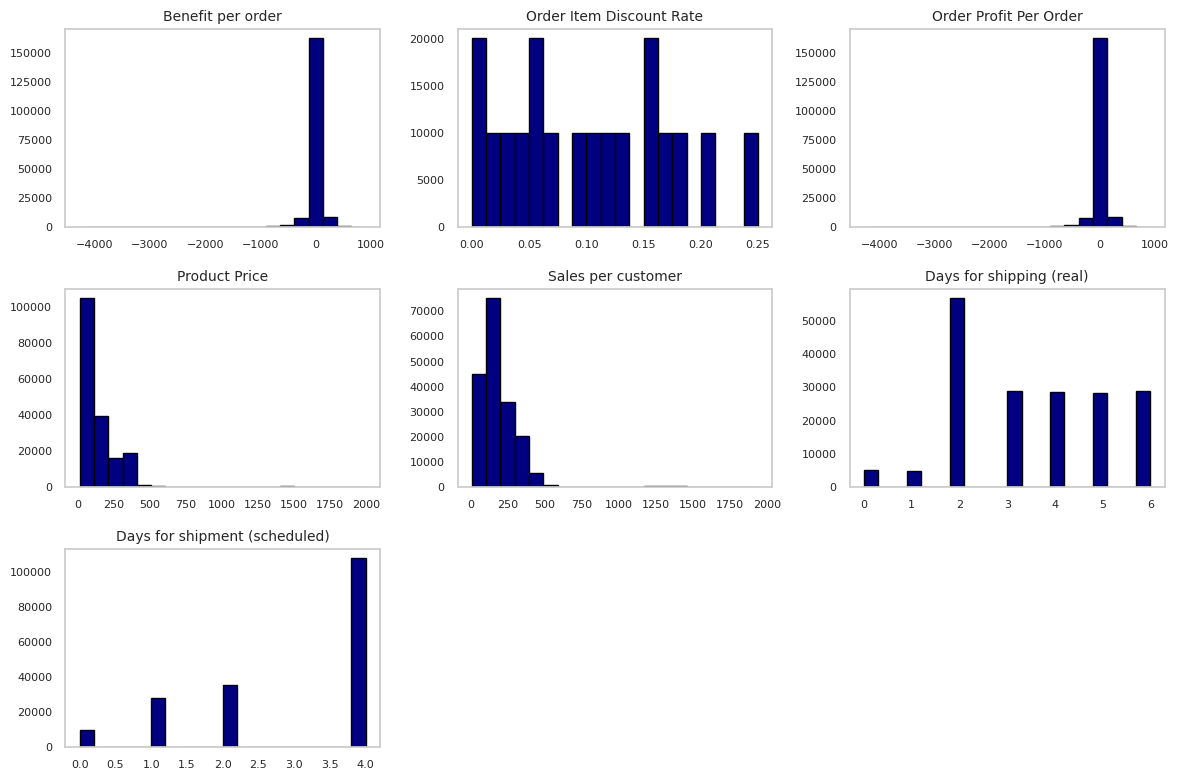

In [ ]:
features = [
    "Benefit per order",
    "Order Item Discount Rate",
    "Order Profit Per Order",
    "Product Price",
    "Sales per customer",
    "Days for shipping (real)",
    "Days for shipment (scheduled)"
]

color = '#000080'  # xanh navy

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(data_cleaned[feature], bins=20, color=color, edgecolor="black")
    axes[i].set_title(feature, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(False)  # tắt grid line

# Xóa subplot thừa nếu có
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 Phân tích Outliers

Do **"Days for shipping (real)"** và **"Days for shipment (scheduled)"** có phân phối gần chuẩn và có mối tương quan cao với biến mục tiêu **"Late delivery risk"**, việc giữ lại outliers trong các biến này có thể **bảo toàn sức mạnh dự báo**. Các outliers trong những biến có tương quan mạnh với target có thể đại diện cho những biến thể quan trọng góp phần vào rủi ro giao hàng trễ, đặc biệt khi xét đến thời gian giao hàng.

Dựa trên histogram ở trên, **Order Item Discount Rate** có phân phối tương đối chuẩn, với các cột rời rạc phản ánh các mức chiết khấu cố định (ví dụ: 5%, 10%, v.v.). Giá trị phân bổ đều trong khoảng mong đợi và không có outliers bất thường đáng lo ngại.

Ngược lại, với các biến có **tương quan thấp với target** (như thông tin khách hàng), outliers có thể **không quan trọng**, và việc làm sạch chúng (loại bỏ hoặc thay thế) **không ảnh hưởng đáng kể đến độ chính xác dự báo**.

- **Z-score** cho "Benefit per Order" và "Order Profit per Order":  
  Hai biến này có dữ liệu gần phân phối chuẩn. Z-score phù hợp để nhận diện outliers trong phân phối chuẩn vì đo lường mức độ lệch của điểm dữ liệu so với trung bình theo số độ lệch chuẩn.

- **IQR** cho "Product Price" và "Sales per Customer":  
  Những biến này có phân phối lệch phải. IQR hiệu quả hơn khi xử lý các phân phối lệch, vì nó xét đến khoảng trải rộng của 50% dữ liệu giữa và đánh dấu các giá trị nằm ngoài khoảng này là outliers.


In [ ]:
from scipy import stats

def z_score_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

z_score_outliers_benefit = z_score_outliers(data_cleaned["Benefit per order"])
z_score_outliers_profit = z_score_outliers(data_cleaned["Order Profit Per Order"])


iqr_outliers_product_price = iqr_outliers(data_cleaned["Product Price"])
iqr_outliers_sales_customer = iqr_outliers(data_cleaned["Sales per customer"])



print(f"Number of outliers in Benefit per Order (Z-score): {z_score_outliers_benefit.sum()}")
print(f"Number of outliers in Order Profit Per Order (Z-score): {z_score_outliers_profit.sum()}")
print(f"Number of outliers in Product Price (IQR): {iqr_outliers_product_price.sum()}")
print(f"Number of outliers in Sales per Customer (IQR): {iqr_outliers_sales_customer.sum()}")

Number of outliers in Benefit per Order (Z-score): 3608
Number of outliers in Order Profit Per Order (Z-score): 3608
Number of outliers in Product Price (IQR): 2048
Number of outliers in Sales per Customer (IQR): 1943


 Xử lý Outliers

 1. Lý do thay thế outliers bằng Median
Median (giá trị trung vị) là một chỉ số trung tâm **không bị ảnh hưởng nhiều bởi các giá trị cực đoan**. Khi dữ liệu có outliers hoặc bị lệch, việc sử dụng median phản ánh xu hướng trung tâm thực sự tốt hơn mean (trung bình).

 2. Ảnh hưởng của độ lệch (Skewness)

 Dữ liệu lệch phải (Right-skewed)
- Ví dụ: `Product Price`, `Sales per Customer`
- Đặc điểm: Đuôi dài bên phải (có vài giá trị rất cao kéo mean lên)
- Giải pháp: Thay outliers bằng median để phản ánh giá trị điển hình mà không bị các giá trị cực lớn làm sai lệch.

 Dữ liệu lệch trái (Left-skewed)
- Ví dụ: `Benefit per Order`, `Order Profit Per Order`
- Đặc điểm: Đuôi dài bên trái (các giá trị âm cực đoan)
- Giải pháp: Thay outliers bằng median để các giá trị cực nhỏ/âm không ảnh hưởng quá nhiều, duy trì sự cân bằng cho phân tích.

 3. Kết luận
Việc sử dụng median giúp dữ liệu **ổn định, cân bằng**, đặc biệt với dữ liệu có giá trị cực đoan hoặc phân phối lệch.


In [ ]:
median_benefit = data_cleaned["Benefit per order"].median()
data_cleaned.loc[z_score_outliers_benefit, "Benefit per order"] = median_benefit

median_profit = data_cleaned["Order Profit Per Order"].median()
data_cleaned.loc[z_score_outliers_profit, "Order Profit Per Order"] = median_profit

median_product_price = data_cleaned["Product Price"].median()
data_cleaned.loc[iqr_outliers_product_price, "Product Price"] = median_product_price

median_sales_customer = data_cleaned["Sales per customer"].median()
data_cleaned.loc[iqr_outliers_sales_customer, "Sales per customer"] = median_sales_customer

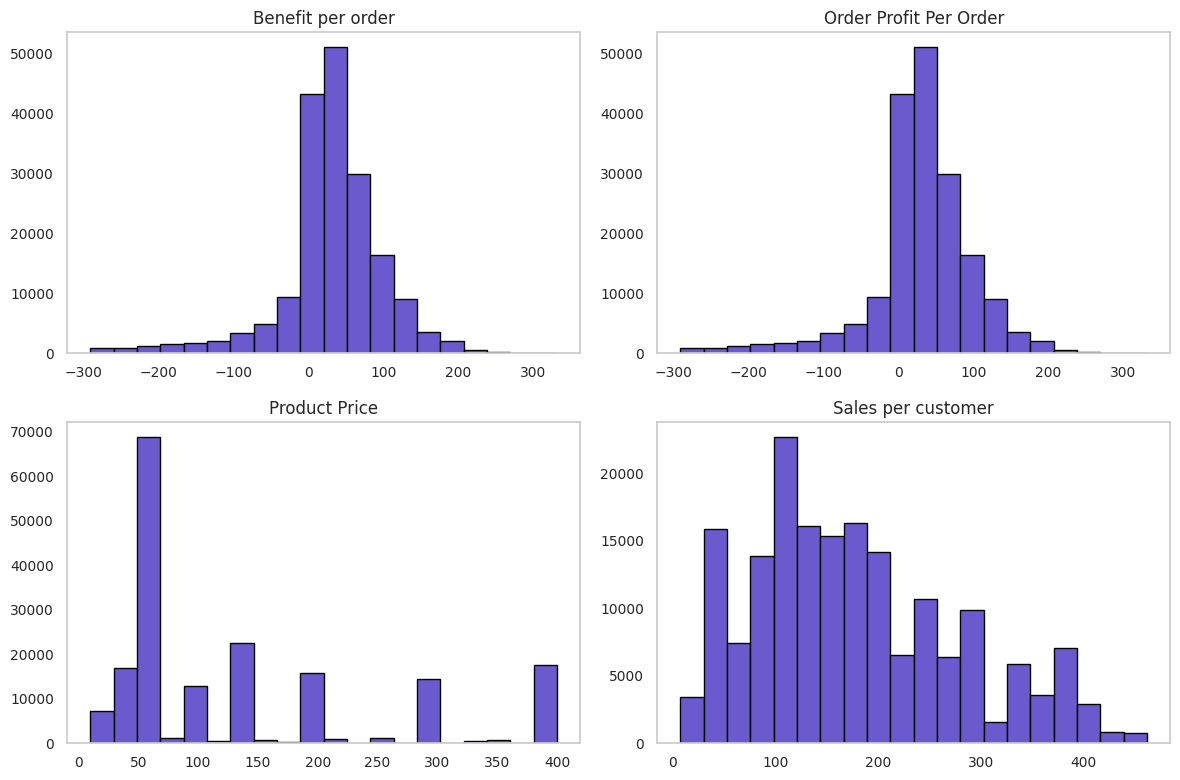

In [ ]:
features = ["Benefit per order", "Order Profit Per Order", "Product Price", "Sales per customer"]
color = '#6A5ACD'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(data_cleaned[feature], bins=20, color=color, edgecolor="black")
    axes[i].set_title(feature, fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Caguas,Puerto Rico,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Caguas,Puerto Rico,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,San Jose,EE. UU.,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Los Angeles,EE. UU.,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Caguas,Puerto Rico,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Segment               180519 non-null  object 
 11  Department Id                  180519 non-null  int64  
 12  Market                        

In [ ]:
data_cleaned.to_csv("/content/drive/MyDrive/DATN/data_for_visualization.csv", index=False)

# **3. Feature selection**

##**3.1 Categorical Features Selection**

In [ ]:
categorical_data = data_cleaned.select_dtypes(include = ['object']).copy()
categorical_data["y"] = data_cleaned["Late_delivery_risk"]
categorical_data.head(5)

,Type,Delivery Status,Customer City,Customer Country,Customer Segment,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,shipping date (DateOrders),Shipping Mode,y
0,DEBIT,Advance shipping,Caguas,Puerto Rico,Consumer,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,2/3/2018 22:56,Standard Class,0
1,TRANSFER,Late delivery,Caguas,Puerto Rico,Consumer,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,1/18/2018 12:27,Standard Class,1
2,CASH,Shipping on time,San Jose,EE. UU.,Consumer,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,1/17/2018 12:06,Standard Class,0
3,DEBIT,Advance shipping,Los Angeles,EE. UU.,Home Office,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,1/16/2018 11:45,Standard Class,0
4,PAYMENT,Advance shipping,Caguas,Puerto Rico,Corporate,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,1/15/2018 11:24,Standard Class,0


In [ ]:
X_cat = categorical_data.drop(columns = ["y"])
y_cat = categorical_data["y"]

In [ ]:
from scipy.stats import chi2_contingency

for col in X_cat.columns:
    table = pd.crosstab(X_cat[col], y_cat)
    print ('\n', table)
    _, pval, _, expected_table = chi2_contingency(table)
    print('Feature:', col, '| p-value:', pval)


 y             0      1
Type                  
CASH       8507  11109
DEBIT     29646  39649
PAYMENT   17721  24004
TRANSFER  25668  24215
Feature: Type | p-value: 5.128672571053333e-239

 y                      0      1
Delivery Status                
Advance shipping   41592      0
Late delivery          0  98977
Shipping canceled   7754      0
Shipping on time   32196      0
Feature: Delivery Status | p-value: 0.0

 y                0    1
Customer City          
Aguadilla       30   20
Alameda         71   47
Albany          40   31
Albuquerque    214  338
Algonquin       47   81
...            ...  ...
Yonkers         56   82
York            99  142
Ypsilanti       69   75
Yuma            29   63
Zanesville      47   68

[563 rows x 2 columns]
Feature: Customer City | p-value: 1.727279395129362e-141

 y                     0      1
Customer Country              
EE. UU.           50160  60986
Puerto Rico       31382  37991
Feature: Customer Country | p-value: 0.660935525163501

 

In [ ]:
data_cleaned["Order City"].nunique()

3597

In [ ]:
columns_to_remove = ['Customer Country', 'Customer Segment', 'Market', 'Delivery Status',
                     'Customer City', 'Order City', 'Order Region', 'Order State', 'Order Status']


data_cleaned = data_cleaned.drop(columns=columns_to_remove)

Loại bỏ các feature categorical không cần thiết

- **Customer Country, Customer Segment, Market**: p-value cao → không có ý nghĩa thống kê, ít đóng góp cho dự đoán `Late_delivery_risk`.  
- **Delivery Status**: trực tiếp liên quan đến target → trùng lặp, loại bỏ.  
- **Customer City, Order City**: quá nhiều giá trị duy nhất (3000+) → tăng độ phức tạp, ít giá trị dự đoán.  
- **Order Region**: tương tự Customer Country, p-value cao → loại bỏ.  
- **Order State**: giống Order City → quá nhiều giá trị duy nhất → loại bỏ.  
- **Order Status**: không cần, chỉ quan tâm đơn hoàn thành, đã thanh toán → loại bỏ.  

**Mục tiêu:** làm sạch dữ liệu, giảm biến dư thừa, tập trung vào các feature quan trọng cho mô hình.



## **3.2 Numerical Features Selection**

In [ ]:
numeric_mask1 = data_cleaned.select_dtypes(include='number').columns
numeric_features1 = data_cleaned[numeric_mask1]

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold=0.05)
var_th.fit_transform(numeric_features1)

array([[   3.       ,    4.       ,   91.25     , ...,   91.25     ,
          73.       ,  327.75     ],
       [   5.       ,    4.       , -249.0899963, ..., -249.0899963,
          73.       ,  327.75     ],
       [   4.       ,    4.       , -247.7799988, ..., -247.7799988,
          73.       ,  327.75     ],
       ...,
       [   5.       ,    4.       ,  141.1100006, ...,  141.1100006,
          45.       ,  399.980011 ],
       [   3.       ,    4.       ,  186.2299957, ...,  186.2299957,
          45.       ,  399.980011 ],
       [   4.       ,    4.       ,  168.9499969, ...,  168.9499969,
          45.       ,  399.980011 ]])

In [ ]:
numeric_features1.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,2,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,73,327.75,0
1,5,4,-249.089996,311.359985,1,73,2,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,73,327.75,0
2,4,4,-247.779999,309.720001,0,73,2,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,73,327.75,0
3,3,4,22.860001,304.809998,0,73,2,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,73,327.75,0
4,2,4,134.210007,298.250000,0,73,2,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,73,327.75,0


In [ ]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [ ]:
X_num = numeric_features1.drop(columns = ["Late_delivery_risk"])
y_num = numeric_features1["Late_delivery_risk"]

In [ ]:
import scipy

print(f"{'col':<30} {'corr':<10} {'pval':<10}")
for col in X_num.columns:
    corr = np.nan
    pval = np.nan
    if X_num[col].nunique() > 1:  # Check if column has more than one unique value
        corr, pval = scipy.stats.pearsonr(X_num[col], y_num)

    print(f"{col:<30} {corr:>10.2f} {pval:>10.4f}")

col                            corr       pval      
Days for shipping (real)             0.40     0.0000
Days for shipment (scheduled)       -0.37     0.0000
Benefit per order                   -0.00     0.1133
Sales per customer                  -0.00     0.1072
Category Id                          0.00     0.4568
Department Id                        0.00     0.6473
Order Item Discount                 -0.00     0.7500
Order Item Discount Rate             0.00     0.8636
Order Item Id                       -0.00     0.5589
Order Item Product Price            -0.00     0.3554
Order Item Profit Ratio             -0.00     0.3252
Order Item Quantity                 -0.00     0.9528
Sales                               -0.00     0.1299
Order Item Total                    -0.00     0.1072
Order Profit Per Order              -0.00     0.1133
Product Category Id                  0.00     0.4568
Product Price                       -0.00     0.3554
Product Status                        nan     

In [ ]:
from sklearn.feature_selection import mutual_info_regression
list(zip(X_num.columns, mutual_info_regression(X_num, y_num, random_state=123, n_neighbors=3)))

[('Days for shipping (real)', np.float64(0.23589606645570171)),
 ('Days for shipment (scheduled)', np.float64(0.11785383423000795)),
 ('Benefit per order', np.float64(0.0)),
 ('Sales per customer', np.float64(0.0)),
 ('Category Id', np.float64(0.0)),
 ('Department Id', np.float64(0.001732394746310817)),
 ('Order Item Discount', np.float64(0.0)),
 ('Order Item Discount Rate', np.float64(0.002555342281704398)),
 ('Order Item Id', np.float64(0.3789144206694264)),
 ('Order Item Product Price', np.float64(0.0)),
 ('Order Item Profit Ratio', np.float64(0.00018182956002732453)),
 ('Order Item Quantity', np.float64(0.0)),
 ('Sales', np.float64(0.0)),
 ('Order Item Total', np.float64(0.0)),
 ('Order Profit Per Order', np.float64(0.0)),
 ('Product Category Id', np.float64(0.0)),
 ('Product Price', np.float64(0.0007318715265673958)),
 ('Product Status', np.float64(0.0))]

 Quyết định loại bỏ đặc trưng

Dựa trên phân tích:

- **Order Item Discount Rate**: Được xác định bởi phương pháp ngưỡng phương sai là có phương sai rất thấp, nghĩa là không cung cấp thông tin hữu ích để phân biệt các bản ghi. Giữ lại đặc trưng này sẽ không cải thiện hiệu suất mô hình.  

- **Product Status**: Có tương quan NaN với biến mục tiêu và điểm thông tin hỗ trợ (mutual information) bằng 0, cho thấy không liên quan đến dự đoán rủi ro giao hàng trễ.  

**Kết luận:** Cả hai đặc trưng này được loại bỏ để giảm nhiễu và độ phức tạp không cần thiết cho mô hình dự đoán.


In [ ]:
features_to_remove = ['Order Item Discount Rate', 'Product Status']

data_cleaned = data_cleaned.drop(columns=features_to_remove)

In [ ]:
data_cleaned.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Late_delivery_risk,int64
Category Id,int64
Department Id,int64
Order Country,object
order date (DateOrders),object


In [ ]:
data_cleaned["Order Item Profit Ratio"].nunique()

162

In [ ]:
data_cleaned["Order Item Id"].unique()

array([180517, 179254, 179253, ...,  65129,  65126,  65113])

In [ ]:
data_cleaned = data_cleaned.drop(columns = "Order Item Id")

In [ ]:
data_cleaned.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Late_delivery_risk,int64
Category Id,int64
Department Id,int64
Order Country,object
order date (DateOrders),object


#**4. New Features Creation**

In [ ]:
# Convert the columns to datetime format
data_cleaned['shipping date (DateOrders)'] = pd.to_datetime(data_cleaned['shipping date (DateOrders)'])
data_cleaned['order date (DateOrders)'] = pd.to_datetime(data_cleaned['order date (DateOrders)'])

data_cleaned['Order_to_Shipment_Time'] = ((data_cleaned['shipping date (DateOrders)'] - data_cleaned['order date (DateOrders)']).astype('timedelta64[s]') / pd.Timedelta(hours=1)).astype(int)
data_cleaned['Order_to_Shipment_Time'].values

array([ 72, 120,  96, ..., 120,  72,  96])

In [ ]:
data_cleaned['ship_day_of_week'] = data_cleaned['shipping date (DateOrders)'].dt.dayofweek
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Country,order date (DateOrders),...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price,shipping date (DateOrders),Shipping Mode,Order_to_Shipment_Time,ship_day_of_week
0,DEBIT,3,4,91.250000,314.640015,0,73,2,Indonesia,2018-01-31 22:56:00,...,1,327.75,314.640015,91.250000,73,327.75,2018-02-03 22:56:00,Standard Class,72,5
1,TRANSFER,5,4,-249.089996,311.359985,1,73,2,India,2018-01-13 12:27:00,...,1,327.75,311.359985,-249.089996,73,327.75,2018-01-18 12:27:00,Standard Class,120,3
2,CASH,4,4,-247.779999,309.720001,0,73,2,India,2018-01-13 12:06:00,...,1,327.75,309.720001,-247.779999,73,327.75,2018-01-17 12:06:00,Standard Class,96,2
3,DEBIT,3,4,22.860001,304.809998,0,73,2,Australia,2018-01-13 11:45:00,...,1,327.75,304.809998,22.860001,73,327.75,2018-01-16 11:45:00,Standard Class,72,1
4,PAYMENT,2,4,134.210007,298.250000,0,73,2,Australia,2018-01-13 11:24:00,...,1,327.75,298.250000,134.210007,73,327.75,2018-01-15 11:24:00,Standard Class,48,0


In [ ]:
data_cleaned['order_day_of_week'] = data_cleaned['order date (DateOrders)'].dt.dayofweek
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Country,order date (DateOrders),...,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price,shipping date (DateOrders),Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week
0,DEBIT,3,4,91.250000,314.640015,0,73,2,Indonesia,2018-01-31 22:56:00,...,327.75,314.640015,91.250000,73,327.75,2018-02-03 22:56:00,Standard Class,72,5,2
1,TRANSFER,5,4,-249.089996,311.359985,1,73,2,India,2018-01-13 12:27:00,...,327.75,311.359985,-249.089996,73,327.75,2018-01-18 12:27:00,Standard Class,120,3,5
2,CASH,4,4,-247.779999,309.720001,0,73,2,India,2018-01-13 12:06:00,...,327.75,309.720001,-247.779999,73,327.75,2018-01-17 12:06:00,Standard Class,96,2,5
3,DEBIT,3,4,22.860001,304.809998,0,73,2,Australia,2018-01-13 11:45:00,...,327.75,304.809998,22.860001,73,327.75,2018-01-16 11:45:00,Standard Class,72,1,5
4,PAYMENT,2,4,134.210007,298.250000,0,73,2,Australia,2018-01-13 11:24:00,...,327.75,298.250000,134.210007,73,327.75,2018-01-15 11:24:00,Standard Class,48,0,5


In [ ]:
data_cleaned['ship_day_of_week_name'] = data_cleaned['ship_day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
data_cleaned['order_day_of_week_name'] = data_cleaned['order_day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

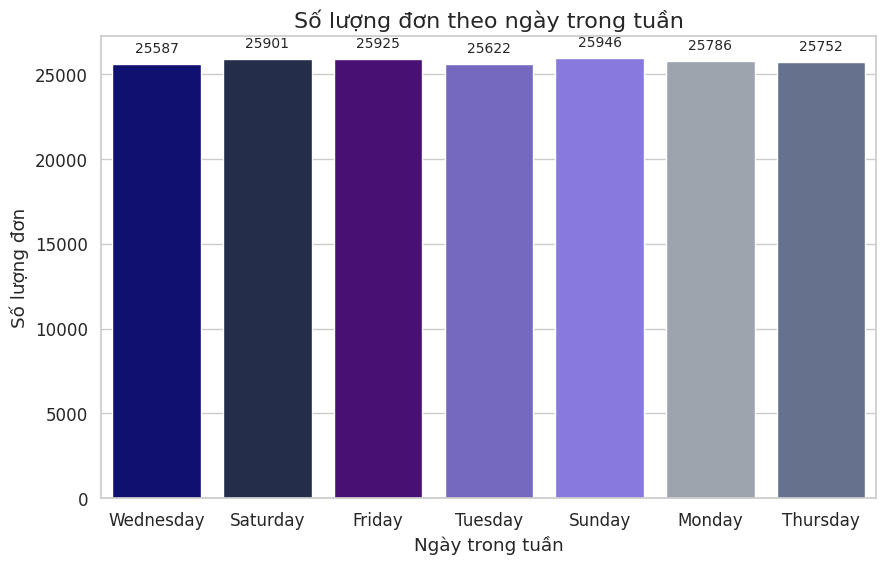

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = ['#000080', '#1D2951', '#4B0082', '#6A5ACD', '#7B68EE',
          '#9CA3AF', '#5F6F94', '#8791B2', '#A0A5C8', '#C5CAE9']

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='order_day_of_week_name',
    data=data_cleaned,
    palette=colors[:7]
)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 500,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10)

plt.title('Số lượng đơn theo ngày trong tuần', fontsize=16)
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng đơn')
plt.show()


In [ ]:
data_cleaned['ship_hour'] = data_cleaned['shipping date (DateOrders)'].dt.hour
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Country,order date (DateOrders),...,Product Category Id,Product Price,shipping date (DateOrders),Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour
0,DEBIT,3,4,91.250000,314.640015,0,73,2,Indonesia,2018-01-31 22:56:00,...,73,327.75,2018-02-03 22:56:00,Standard Class,72,5,2,Saturday,Wednesday,22
1,TRANSFER,5,4,-249.089996,311.359985,1,73,2,India,2018-01-13 12:27:00,...,73,327.75,2018-01-18 12:27:00,Standard Class,120,3,5,Thursday,Saturday,12
2,CASH,4,4,-247.779999,309.720001,0,73,2,India,2018-01-13 12:06:00,...,73,327.75,2018-01-17 12:06:00,Standard Class,96,2,5,Wednesday,Saturday,12
3,DEBIT,3,4,22.860001,304.809998,0,73,2,Australia,2018-01-13 11:45:00,...,73,327.75,2018-01-16 11:45:00,Standard Class,72,1,5,Tuesday,Saturday,11
4,PAYMENT,2,4,134.210007,298.250000,0,73,2,Australia,2018-01-13 11:24:00,...,73,327.75,2018-01-15 11:24:00,Standard Class,48,0,5,Monday,Saturday,11


In [ ]:
data_cleaned['order_hour'] = data_cleaned['order date (DateOrders)'].dt.hour
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,...,Product Price,shipping date (DateOrders),Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Caguas,Puerto Rico,...,327.75,2018-02-03 22:56:00,Standard Class,72,5,2,Saturday,Wednesday,22,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Caguas,Puerto Rico,...,327.75,2018-01-18 12:27:00,Standard Class,120,3,5,Thursday,Saturday,12,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,San Jose,EE. UU.,...,327.75,2018-01-17 12:06:00,Standard Class,96,2,5,Wednesday,Saturday,12,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Los Angeles,EE. UU.,...,327.75,2018-01-16 11:45:00,Standard Class,72,1,5,Tuesday,Saturday,11,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Caguas,Puerto Rico,...,327.75,2018-01-15 11:24:00,Standard Class,48,0,5,Monday,Saturday,11,11


In [ ]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [ ]:
data_cleaned['order date (DateOrders)'] = pd.to_datetime(data_cleaned['order date (DateOrders)'])
data_cleaned['shipping date (DateOrders)'] = pd.to_datetime(data_cleaned['shipping date (DateOrders)'])


In [ ]:
data_cleaned['ship_hour'] = data_cleaned['shipping date (DateOrders)'].dt.hour
data_cleaned['order_hour'] = data_cleaned['order date (DateOrders)'].dt.hour


In [ ]:
data_cleaned['ship_daypart'] = data_cleaned['ship_hour'].apply(f)
data_cleaned['order_daypart'] = data_cleaned['order_hour'].apply(f)


In [ ]:
data_cleaned['ship_daypart_n'] = data_cleaned['ship_daypart'].map({
    'Early Morning': 0,
    'Morning': 1,
    'Noon': 2,
    'Eve': 3,
    'Night': 4,
    'Late Night': 5
})
data_cleaned['order_daypart_n'] = data_cleaned['order_daypart'].map({
    'Early Morning': 0,
    'Morning': 1,
    'Noon': 2,
    'Eve': 3,
    'Night': 4,
    'Late Night': 5
})
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Country,order date (DateOrders),...,ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour,ship_daypart,order_hour,order_daypart,ship_daypart_n,order_daypart_n
0,DEBIT,3,4,91.250000,314.640015,0,73,2,Indonesia,2018-01-31 22:56:00,...,5,2,Saturday,Wednesday,22,Night,22,Night,4,4
1,TRANSFER,5,4,-249.089996,311.359985,1,73,2,India,2018-01-13 12:27:00,...,3,5,Thursday,Saturday,12,Morning,12,Morning,1,1
2,CASH,4,4,-247.779999,309.720001,0,73,2,India,2018-01-13 12:06:00,...,2,5,Wednesday,Saturday,12,Morning,12,Morning,1,1
3,DEBIT,3,4,22.860001,304.809998,0,73,2,Australia,2018-01-13 11:45:00,...,1,5,Tuesday,Saturday,11,Morning,11,Morning,1,1
4,PAYMENT,2,4,134.210007,298.250000,0,73,2,Australia,2018-01-13 11:24:00,...,0,5,Monday,Saturday,11,Morning,11,Morning,1,1


In [ ]:
data_cleaned.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Late_delivery_risk,int64
Category Id,int64
Department Id,int64
Order Country,object
order date (DateOrders),datetime64[ns]


In [ ]:
# Drop Useless Categorical
data_cleaned.drop(['order date (DateOrders)', 'shipping date (DateOrders)', 'ship_day_of_week_name',
           'order_day_of_week_name', 'ship_daypart', 'order_daypart', 'Order Country'], axis=1, inplace=True)

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/DATN/data_clean_ver1.csv')

#**5. Data preprocessing**

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Id                    180519 non-null  int64  
 7   Department Id                  180519 non-null  int64  
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Product Price       180519 non-null  float64
 10  Order Item Profit Ratio        180519 non-null  float64
 11  Order Item Quantity            180519 non-null  int64  
 12  Sales                         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from category_encoders import OneHotEncoder as OHE

columns_to_drop = [
    'Days for shipping (real)',
    'Order_to_Shipment_Time',
    'ship_day_of_week',
    'ship_hour',
    'ship_daypart_n'
]

data_cleaned = data_cleaned.drop(columns=columns_to_drop)

seed = 42
train_set, test_set = train_test_split(data_cleaned, test_size=0.2, random_state=seed, stratify=data_cleaned['Late_delivery_risk'])

X_train = train_set.drop(['Late_delivery_risk'], axis=1)
y_train = train_set['Late_delivery_risk']

X_test = test_set.drop(['Late_delivery_risk'], axis=1)
y_test = test_set['Late_delivery_risk']

##**5.1 Categorical Features Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42

train_set, test_set = train_test_split(data_cleaned, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['Late_delivery_risk'], axis = 'columns')
y_train = train_set['Late_delivery_risk']

X_test = test_set.drop(['Late_delivery_risk'], axis = 1)
y_test = test_set['Late_delivery_risk']

In [ ]:
data_cleaned.select_dtypes(include='object').columns

Index(['Type', 'Shipping Mode'], dtype='object')

In [ ]:
data_cleaned["Shipping Mode"].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [ ]:
ord_enc_shipping_mode = OrdinalEncoder(categories=[["Standard Class", "Second Class", "First Class", "Same Day"]])

X_train["Shipping Mode"] = ord_enc_shipping_mode.fit_transform(X_train[["Shipping Mode"]])
X_test["Shipping Mode"] = ord_enc_shipping_mode.transform(X_test[["Shipping Mode"]])

X_train["Shipping Mode"].head(4)

,Shipping Mode
116587,2.0
36340,1.0
175763,2.0
96918,2.0


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder as OHE

ohe = OHE(cols=['Type'], use_cat_names=True)


X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

X_train.head()

,Type_TRANSFER,Type_PAYMENT,Type_DEBIT,Type_CASH,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Department Id,...,Product Category Id,Product Price,Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week,ship_hour,order_hour,ship_daypart_n,order_daypart_n
116587,1,0,0,0,2,1,1.750000,174.570007,17,4,...,17,59.990002,2.0,48,5,3,16,16,2,2
36340,0,1,0,0,2,2,38.220001,109.190002,18,4,...,18,129.990005,1.0,48,0,5,11,11,1,1
175763,0,0,1,0,2,1,35.099998,129.990005,18,4,...,18,129.990005,2.0,48,3,1,7,7,0,0
96918,0,0,1,0,2,1,3.960000,198.000000,24,5,...,24,50.000000,2.0,48,6,4,15,15,2,2
71197,1,0,0,0,2,1,5.220000,260.959992,17,4,...,17,59.990002,2.0,48,1,6,13,13,2,2


In [ ]:
X_train.dtypes

,0
Type_TRANSFER,int64
Type_PAYMENT,int64
Type_DEBIT,int64
Type_CASH,int64
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Category Id,int64
Department Id,int64


##**5.2 Numerical features**

In [ ]:
ord_enc_shipping_mode = OrdinalEncoder(
    categories=[["Standard Class", "Second Class", "First Class", "Same Day"]]
)

X_train["Shipping Mode"] = ord_enc_shipping_mode.fit_transform(X_train[["Shipping Mode"]])
X_test["Shipping Mode"] = ord_enc_shipping_mode.transform(X_test[["Shipping Mode"]])

ohe = OHE(cols=['Type'], use_cat_names=True)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144415 entries, 116587 to 121958
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type_TRANSFER                  144415 non-null  int64  
 1   Type_PAYMENT                   144415 non-null  int64  
 2   Type_DEBIT                     144415 non-null  int64  
 3   Type_CASH                      144415 non-null  int64  
 4   Days for shipping (real)       144415 non-null  float64
 5   Days for shipment (scheduled)  144415 non-null  float64
 6   Benefit per order              144415 non-null  float64
 7   Sales per customer             144415 non-null  float64
 8   Category Id                    144415 non-null  int64  
 9   Department Id                  144415 non-null  int64  
 10  Order Item Discount            144415 non-null  float64
 11  Order Item Product Price       144415 non-null  float64
 12  Order Item Profit Ratio       

In [ ]:
X_train.head()

,Type_TRANSFER,Type_PAYMENT,Type_DEBIT,Type_CASH,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Department Id,...,Product Category Id,Product Price,Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week,ship_hour,order_hour,ship_daypart_n,order_daypart_n
116587,1,0,0,0,0.333333,0.25,0.824544,0.086458,17,4,...,17,0.025126,2.0,0.272727,5,3,16,16,2,2
36340,0,1,0,0,0.333333,0.50,0.831576,0.052626,18,4,...,18,0.060302,1.0,0.272727,0,5,11,11,1,1
175763,0,0,1,0,0.333333,0.25,0.830974,0.063389,18,4,...,18,0.060302,2.0,0.272727,3,1,7,7,0,0
96918,0,0,1,0,0.333333,0.25,0.824970,0.098582,24,5,...,24,0.020106,2.0,0.272727,6,4,15,15,2,2
71197,1,0,0,0,0.333333,0.25,0.825213,0.131162,17,4,...,17,0.025126,2.0,0.272727,1,6,13,13,2,2


In [ ]:
scaler = MinMaxScaler()

numerical_features_to_scale = [
    "Days for shipment (scheduled)",
    "Benefit per order",
    "Sales per customer",
    "Order Item Discount",
    "Order Item Product Price",
    "Order Item Profit Ratio",
    "Order Item Quantity",
    "Sales",
    "Order Item Total",
    "Order Profit Per Order",
    "Product Price"
]

X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])


#**6. Machine learning algorithm**

 Lựa chọn thuật toán

**Random Forest**:

* Thích hợp cho chọn đặc trưng (feature selection).
* Xử lý tốt cả dữ liệu số và phân loại.
* Chịu được ngoại lệ (outliers).
* Thích hợp với tập dữ liệu lớn, cung cấp thông tin về độ quan trọng của các đặc trưng.
* Giảm overfitting nhờ phương pháp ensemble.

**Logistic Regression**:

* Thuật toán cơ bản, dễ giải thích.
* Tốt cho phân loại nhị phân, cho biết tầm quan trọng của đặc trưng thông qua hệ số (coefficients).
* Phù hợp với dữ liệu cân bằng.


**XGBoost**:

* Thuật toán hiệu suất cao, thường đạt kết quả tốt trong các cuộc thi.
* Xử lý tốt dữ liệu lớn, cung cấp thông tin về độ quan trọng của đặc trưng.
* Có cơ chế regularization giảm overfitting, xử lý tốt dữ liệu thiếu và dữ liệu lệch lớp.


**TabPFN**

##**6.1 Logistic regresstion**


Accuracy: 0.691890

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16308
           1       0.80      0.59      0.68     19796

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104


Confusion Matrix:
[[13340  2968]
 [ 8156 11640]]
[[TN=13,340  FP=2,968]
 [FN=8,156  TP=11,640]]


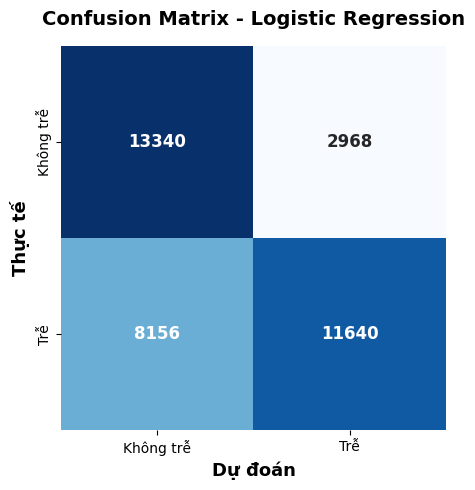


Top 10 Most Important Features:
                      Feature  Coefficient  Abs_Coefficient
Days for shipment (scheduled)    -9.720470         9.720470
                Shipping Mode    -2.762639         2.762639
                 Type_PAYMENT     1.741364         1.741364
                   Type_DEBIT     1.723334         1.723334
                    Type_CASH     1.691780         1.691780
                Type_TRANSFER     1.292480         1.292480
                Product Price     0.325262         0.325262
     Order Item Product Price     0.325262         0.325262
             Order Item Total    -0.223797         0.223797
           Sales per customer    -0.223797         0.223797


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000, random_state=seed, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\nConfusion Matrix:")
print(cm_lr)
print(f"[[TN={cm_lr[0,0]:,}  FP={cm_lr[0,1]:,}]")
print(f" [FN={cm_lr[1,0]:,}  TP={cm_lr[1,1]:,}]]")

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='g',
    cmap='Blues',
    cbar=False,
    linewidths=0,
    square=True,
    xticklabels=['Không trễ', 'Trễ'],
    yticklabels=['Không trễ', 'Trễ'],
    annot_kws={"size": 12, "weight": "bold"}
)
plt.xlabel('Dự đoán', fontsize=13, fontweight='bold')
plt.ylabel('Thực tế', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold', pad=15)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(coefficients.head(10).to_string(index=False))

## **6.2 TabPFN**

In [ ]:
!huggingface-cli login


In [ ]:
!pip install --upgrade tabpfn

TABPFN (10,000 samples)
Training on 10000 samples with 22 features


tabpfn-v2.5-classifier-v2.5_default.ckpt:   0%|          | 0.00/42.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]


Accuracy: 0.720474

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74     16308
           1       0.86      0.59      0.70     19796

    accuracy                           0.72     36104
   macro avg       0.75      0.73      0.72     36104
weighted avg       0.76      0.72      0.72     36104


Confusion Matrix:
[[14372  1936]
 [ 8156 11640]]


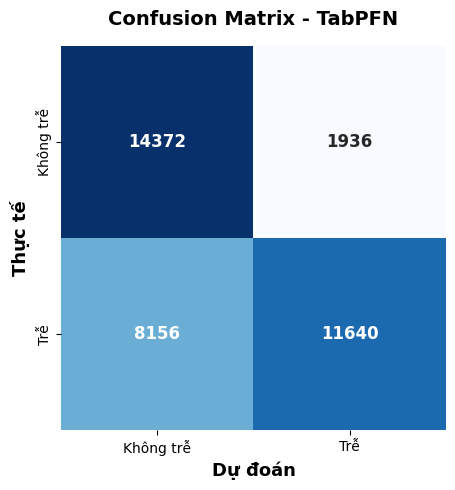


TabPFN training completed
Trained on 10000 samples (algorithm limitation)


In [ ]:
print("="*60)
print("TABPFN (10,000 samples)")
print("="*60)

# Chuẩn bị 10k samples cho TabPFN
X_train_10k = X_train.sample(n=10000, random_state=seed)
y_train_10k = y_train.loc[X_train_10k.index]

print(f"Training on {X_train_10k.shape[0]} samples with {X_train_10k.shape[1]} features")

# Import TabPFN
from tabpfn import TabPFNClassifier

# Train model - BỎ N_ensemble_configurations
clf_tabpfn = TabPFNClassifier(device='cuda')
clf_tabpfn.fit(X_train_10k.values, y_train_10k.values)

# Predict
y_pred_tabpfn = clf_tabpfn.predict(X_test.values)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_tabpfn):.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tabpfn))

# Confusion Matrix
cm_tabpfn = confusion_matrix(y_test, y_pred_tabpfn)
print(f"\nConfusion Matrix:")
print(cm_tabpfn)

# Visualize
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_tabpfn,
    annot=True,
    fmt='g',
    cmap='Blues',
    cbar=False,
    linewidths=0,
    square=True,
    xticklabels=['Không trễ', 'Trễ'],
    yticklabels=['Không trễ', 'Trễ'],
    annot_kws={"size": 12, "weight": "bold"}
)

plt.xlabel('Dự đoán', fontsize=13, fontweight='bold')
plt.ylabel('Thực tế', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix - TabPFN', fontsize=14, fontweight='bold', pad=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

print("\nTabPFN training completed")
print(f"Trained on {X_train_10k.shape[0]} samples (algorithm limitation)")

## **6.3 Xg Boost**

In [ ]:
!pip install xgboost

XGBOOST

Accuracy: 0.713051

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     16308
           1       0.82      0.61      0.70     19796

    accuracy                           0.71     36104
   macro avg       0.73      0.72      0.71     36104
weighted avg       0.74      0.71      0.71     36104


Confusion Matrix:
[[13759  2549]
 [ 7811 11985]]


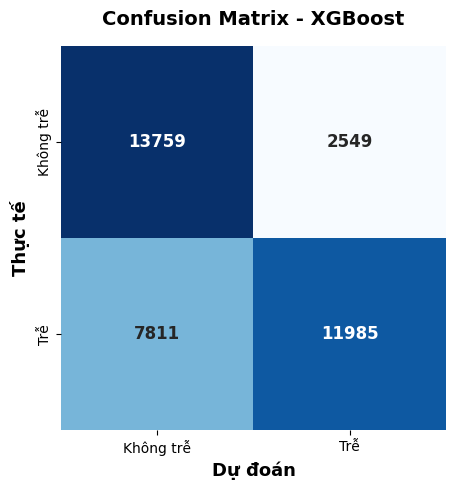


Top 10 Important Features:
                          Feature  Importance
4   Days for shipment (scheduled)    0.767552
1                   Type_TRANSFER    0.090388
20                     order_hour    0.052672
0                    Type_PAYMENT    0.008278
3                       Type_CASH    0.006964
9             Order Item Discount    0.006511
19              order_day_of_week    0.006364
6              Sales per customer    0.006350
12            Order Item Quantity    0.006342
10       Order Item Product Price    0.006223


In [ ]:
# XGBOOST

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("="*60)
print("XGBOOST")
print("="*60)

xgb_model = XGBClassifier(random_state=seed, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_xgb):.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"\nConfusion Matrix:")
print(cm_xgb)

# Visualize
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt='g',
    cmap='Blues',
    cbar=False,
    linewidths=0,
    square=True,
    xticklabels=['Không trễ', 'Trễ'],
    yticklabels=['Không trễ', 'Trễ'],
    annot_kws={"size": 12, "weight": "bold"}
)

plt.xlabel('Dự đoán', fontsize=13, fontweight='bold')
plt.ylabel('Thực tế', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix - XGBoost', fontsize=14, fontweight='bold', pad=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# Feature Importances
xgb_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(xgb_feature_importances.head(10))

# **CONCLUSION**

In [ ]:
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Order Item Discount,Order Item Product Price,...,Product Category Id,Product Price,Shipping Mode,Order_to_Shipment_Time,ship_day_of_week,order_day_of_week,ship_hour,order_hour,ship_daypart_n,order_daypart_n
0,DEBIT,3,4,91.250000,314.640015,0,73,2,13.110000,327.75,...,73,327.75,Standard Class,72,5,2,22,22,4,4
1,TRANSFER,5,4,-249.089996,311.359985,1,73,2,16.389999,327.75,...,73,327.75,Standard Class,120,3,5,12,12,1,1
2,CASH,4,4,-247.779999,309.720001,0,73,2,18.030001,327.75,...,73,327.75,Standard Class,96,2,5,12,12,1,1
3,DEBIT,3,4,22.860001,304.809998,0,73,2,22.940001,327.75,...,73,327.75,Standard Class,72,1,5,11,11,1,1
4,PAYMENT,2,4,134.210007,298.250000,0,73,2,29.500000,327.75,...,73,327.75,Standard Class,48,0,5,11,11,1,1
